<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

### 1. Import the data

In [2]:
csv_file = 'ais.csv'
df = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [3]:
df.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [5]:
# ANSWER
X = df.drop(['sex', 'sport'], axis=1)

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [7]:
# ANSWER
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [8]:
Kmean.inertia_

748796.9686138614

In [9]:
Kmean.cluster_centers_

array([[151.74257426,   5.00940594,   7.21584158,  45.49009901,
         15.49306931,  99.0990099 ,  23.83940594,  51.47425743,
          9.30970297,  74.25425743, 185.21188119,  82.12475248],
       [ 51.25742574,   4.42782178,   7.0019802 ,  40.69306931,
         13.63960396,  54.65346535,  22.07237624,  86.56930693,
         17.70514851,  55.49316832, 174.9960396 ,  67.89108911]])

### 5. Get the labels for the models

In [10]:
# ANSWER
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [11]:
# ANSWER
k_values = []
inertia = []
for i in range(2, 20): #has to start at 2 - as we start at 2
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)
    k_values.append(i)
    print (i)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [12]:
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [13]:
inertia

[748796.9686138614,
 546653.1381256412,
 433381.2329224947,
 378511.4415571104,
 334320.15850324865,
 290288.82986241946,
 265896.0618462646,
 244839.06586242613,
 224907.01999568485,
 203460.00700227614,
 189379.29060697442,
 178735.57943219627,
 172007.48932641654,
 165928.50853358945,
 158487.24690248197,
 150218.249058085,
 141519.86313174787,
 137676.77136244954]

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

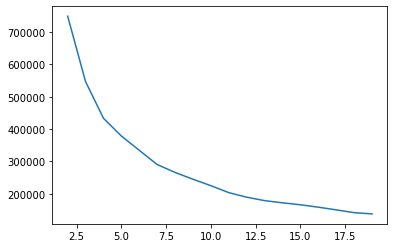

In [14]:
# ANSWER
plt.plot(k_values, inertia)
plt.show()

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

In [42]:
# ANSWER
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

label = Kmean.labels_.astype(str)
label[label == '1'] = 'm_pred'
label[label == '0'] = 'f_pred'
label

array(['f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred',
       'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pred', 'f_pr

<AxesSubplot:xlabel='ht', ylabel='wt'>

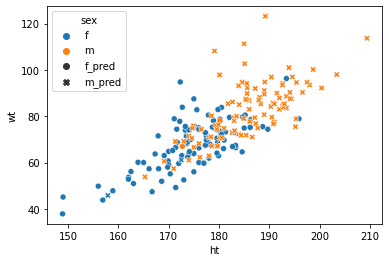

In [43]:
# female = blue circle, male = orange cross
sns.scatterplot(data=df, x='ht', y='wt', hue = 'sex', style = label)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



